# __Casos de uso__
## Grupo 01
## Módulo 02: Obtención y preparación de datos

#<font color='blue'>**Caso de uso: Carlos Avilés Tapia**</font>
##***Título: Limpieza de datos de un DataFrame con Pandas***

  Para este ejercicio, se utilizará la base de datos de organizaciones sin fines de lucro del Servicio de registro civil e identificación. El cual se compone de todas las organizaciones constituídas en el país.

  Dicha información ha sido enviada históricamente por el Ministerio de justicia y derechos humanos y por las municipalidades del país, sin embargo, dicha información, al actualizarse mensualmente, presenta inconsistencias y desprolijidades que dificultan cualquier tipo de análisis que se pretenda realizar con dichos datos.

  Es así que se utilizarán los métodos incluídos en la biblioteca Pandas para limpiar dicha base de datos y poder tener a disposición datos que permitan extraer información relevante.

  Para este caso en particular, se utilizarán exclusivamente los datos corresponientes a la región de Valparaíso, sin perjuicio de poder ampliar el alcance de este ejercicio al resto de las regiones incorporadas en este registro.

In [ ]:
# En primer lugar se monta el drive para extraer el archivo.
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Se importa la bliblioteca Pandas con la que trabajará en el ejercicio.
import pandas as pd

In [ ]:
# Se define el archivo con el que se va a trabajar.
ruta_archivo_excel = "/content/drive/MyDrive/Archivos/RPJ_2012_a_2023_Valparaiso.xlsx"

# Se lee el archivo Excel y se crea un DataFrame.
df_organizaciones = pd.read_excel(ruta_archivo_excel)

In [ ]:
df_organizaciones.sample(5)

,NRO DE INSCRIPCION,NOMBRE PJ,RUT,ORIGEN,COMUNA,REGION,DIRECCION,TIPO,FECHA DE CONCESION,FECHA DE INSCRIPCION,CLASIFICACION,ESTADO
23167,268311,FUNDACION EDUCACIONAL MAMURIK,NO INFORMADO,MUNICIPALIDAD,CASABLANCA ...,REGION DE VALPARAISO ...,S/I,FUNDACION,19-12-2017,19-12-2017,EDUCACION,VIGENTE
29248,286567,AGRUPACION SOCIAL FIBROMALGIA FIBROAYUDO,NO INFORMADO,MUNICIPALIDAD,SAN ANTONIO ...,REGION DE VALPARAISO ...,"BROKMAN N° 1700, 30 DE MARZO, SAN ANTONIO",ORGANIZACIÓN FUNCIONAL,24-12-2018,07-02-2019,AGRUPACION DE SALUD,VIGENTE
20200,73266,CLUB DE ADULTO MAYOR SAGRADO CORAZON DE TEJAS ...,00,MUNICIPALIDAD,SAN ANTONIO ...,REGION DE VALPARAISO ...,AVENIDA ARRAYAN N° 1060,COMUNITARIA/VECINAL,17-06-2003,23-05-2013,CENTRO ADULTO MAYOR,VIGENTE
185,73514,COMITÉ HABITACIONAL FUTURO,NO INFORMADO,MUNICIPALIDAD,SAN ANTONIO ...,REGION DE VALPARAISO ...,S/I,COMUNITARIA/VECINAL,1990-01-01 00:00:00,23-05-2013,NaN,VIGENTE
7896,225943,CENTRO DE APOYO AL DEPORTISTA INFANTO-JUVENIL ...,NO INFORMADO,MUNICIPALIDAD,VIÑA DEL MAR ...,REGION DE VALPARAISO ...,A.V FREI / AMPL VILLA DULCE 311 VIÑA DEL MAR,COMUNITARIA/VECINAL,07-08-2008,02-05-2016,NaN,VIGENTE


In [ ]:
# Con la función len() es posible ver la cantidad de registros del dataframe.
print(f'El dataframe original contiene {len(df_organizaciones)} registros.')

El dataframe original contiene 37628 registros.


In [ ]:
# Lo primero es comprobar la existencia de registros duplicados.
duplicados = df_organizaciones.duplicated()
print(f'El dataframe contiene {duplicados.sum()} registros duplicados.')

El dataframe contiene 0 registros duplicados.


In [ ]:
# De la muestra del dataframe, hay columnas que no aportan información relevante, por lo que se eliminarán.
columnas_a_eliminar = ['RUT', 'ORIGEN', 'REGION']
df_organizaciones = df_organizaciones.drop(columns = columnas_a_eliminar)
df_organizaciones.sample(5)

,NRO DE INSCRIPCION,NOMBRE PJ,COMUNA,DIRECCION,TIPO,FECHA DE CONCESION,FECHA DE INSCRIPCION,CLASIFICACION,ESTADO
5788,13527,MUTUAL DE SEGUROS DE CHILE,VALPARAÍSO ...,MOLINA 446,CORPORACION,05-11-1919,31-01-2013,OTRAS,VIGENTE
17412,228207,JUNTA DE VECINOS JOSE MIGUEL CARRERA,CALERA ...,CARRERA PSJE. FERROVIARIO Nº 1 LA CALERA,ORGANIZACIÓN TERRITORIAL,15-02-1990,02-05-2016,JUNTA DE VECINOS O CONDOMINIOS,VIGENTE
17382,214471,JUNTA DE VECINOS EL TRIGAL,CALERA ...,AVDA. MARATHON 312,ORGANIZACIÓN TERRITORIAL,15-02-1990,18-12-2015,JUNTA DE VECINOS O CONDOMINIOS,VIGENTE
18096,279458,FUNDACION AMDA LLAY LLAY,LLAILLAY ...,BALMACEDA N°214 DEPTO.32,FUNDACION,15-08-2018,15-08-2018,N/D,VIGENTE
5618,184040,CLUB DE ADULTO MAYOR RENACER SANTA ANA,NOGALES ...,CAPILLA EL OLIVO NOGALES,COMUNITARIA/VECINAL,05-09-2000,07-10-2014,NaN,VIGENTE


In [ ]:
# Se analizan las columnas sobre las que se podrían realizar agrupaciones para comprobar inconsistencias.
# Se comienza por la columna 'COMUNA'.
df_organizaciones['COMUNA'].unique()

array(['CALERA                                                 ',
       'SAN ANTONIO                                            ',
       'ZAPALLAR                                               ',
       'PUCHUNCAVÍ                                             ',
       'QUILLOTA                                               ',
       'QUINTERO                                               ',
       'SANTA MARÍA                                            ',
       'LOS ANDES                                              ',
       'CASABLANCA                                             ',
       'CONCÓN                                                 ',
       'PETORCA                                                ',
       'CALLE LARGA                                            ',
       'CARTAGENA                                              ',
       'PANQUEHUE                                              ',
       'LLAY LLAY                                              ',
       'OL

In [ ]:
# En primer lugar, cada comuna está ingresada con una cantidad no deseada de espacios.
# Se eliminan esos espacios.
df_organizaciones['COMUNA'] = df_organizaciones['COMUNA'].str.strip()
df_organizaciones['COMUNA'].unique()

array(['CALERA', 'SAN ANTONIO', 'ZAPALLAR', 'PUCHUNCAVÍ', 'QUILLOTA',
       'QUINTERO', 'SANTA MARÍA', 'LOS ANDES', 'CASABLANCA', 'CONCÓN',
       'PETORCA', 'CALLE LARGA', 'CARTAGENA', 'PANQUEHUE', 'LLAY LLAY',
       'OLMUÉ', 'VALPARAÍSO', 'ALGARROBO', 'VIÑA DEL MAR', 'NOGALES',
       'QUILPUÉ', 'PUTAENDO', 'LA LIGUA', 'CABILDO', 'SAN FELIPE',
       'VILLA ALEMANA', 'SANTO DOMINGO', 'EL TABO', 'EL QUISCO',
       'RINCONADA', 'LIMACHE', 'ISLA DE PASCUA', 'PAPUDO', 'SAN ESTEBAN',
       'LA CRUZ', 'HIJUELAS', nan, 'LLAILLAY', 'CATEMU', 'JUAN FERNÁNDEZ',
       'SANTIAGO', 'PUERTO MONTT', 'HUARA'], dtype=object)

In [ ]:
# Se observa, además, registros de comunas ajenas a la región de Valparaíso.
comuna_ajenas = ['SANTIAGO', 'PUERTO MONTT', 'HUARA']

# Se eliminan dichos registros.
df_organizaciones.drop(df_organizaciones[df_organizaciones['COMUNA'].isin(comuna_ajenas)].index, inplace=True)

df_organizaciones['COMUNA'].unique()

array(['CALERA', 'SAN ANTONIO', 'ZAPALLAR', 'PUCHUNCAVÍ', 'QUILLOTA',
       'QUINTERO', 'SANTA MARÍA', 'LOS ANDES', 'CASABLANCA', 'CONCÓN',
       'PETORCA', 'CALLE LARGA', 'CARTAGENA', 'PANQUEHUE', 'LLAY LLAY',
       'OLMUÉ', 'VALPARAÍSO', 'ALGARROBO', 'VIÑA DEL MAR', 'NOGALES',
       'QUILPUÉ', 'PUTAENDO', 'LA LIGUA', 'CABILDO', 'SAN FELIPE',
       'VILLA ALEMANA', 'SANTO DOMINGO', 'EL TABO', 'EL QUISCO',
       'RINCONADA', 'LIMACHE', 'ISLA DE PASCUA', 'PAPUDO', 'SAN ESTEBAN',
       'LA CRUZ', 'HIJUELAS', nan, 'LLAILLAY', 'CATEMU', 'JUAN FERNÁNDEZ'],
      dtype=object)

In [ ]:
# Se revisan los datos nulos para la columna "COMUNA".
registros_sin_comuna = df_organizaciones[df_organizaciones['COMUNA'].isnull()]
print(f'{len(registros_sin_comuna)} registros sin comuna.')

139 registros sin comuna.


In [ ]:
# Se eliminan dichos registros.
df_organizaciones.dropna(subset=['COMUNA'], inplace=True)

In [ ]:
# Comprobación de la eliminación.
registros_sin_comuna = df_organizaciones[df_organizaciones['COMUNA'].isnull()]
print(f'{len(registros_sin_comuna)} registros sin comuna.')

0 registros sin comuna.


In [ ]:
# Siguiendo con las columnas que permiten agrupar, se examina la columna TIPO.
df_organizaciones['TIPO'].unique()

array(['ORGANIZACIÓN TERRITORIAL', 'COMUNITARIA/VECINAL',
       'ORGANIZACIÓN FUNCIONAL', 'CORPORACION', 'CORPORACION/FUNDACION',
       'FUNDACION', 'OTRA', 'LEY ESPECIAL INDIGENA',
       'LEY ESPECIAL DE DEPORTE', 'LEYES ESPECIALES',
       'LEY ESPECIAL DE CULTO'], dtype=object)

In [ ]:
# De acuerdo a la normativa vigente hay "TIPOS" que hacen referencia al mismo concepto,
# por lo que se pueden fusionar.
mapeo_tipos = {
    'ORGANIZACIÓN TERRITORIAL': 'COMUNITARIA',
    'COMUNITARIA/VECINAL': 'COMUNITARIA',
    'ORGANIZACIÓN FUNCIONAL': 'COMUNITARIA',
    'CORPORACION': 'CODIGO CIVIL',
    'CORPORACION/FUNDACION': 'CODIGO CIVIL',
    'FUNDACION': 'CODIGO CIVIL',
    'OTRA': 'OTRAS LEYES',
    'LEY ESPECIAL INDIGENA': 'OTRAS LEYES',
    'LEY ESPECIAL DE DEPORTE': 'OTRAS LEYES',
    'LEYES ESPECIALES': 'OTRAS LEYES',
    'LEY ESPECIAL DE CULTO': 'OTRAS LEYES',
}

df_organizaciones['TIPO'] = df_organizaciones['TIPO'].replace(mapeo_tipos)
df_organizaciones['TIPO'].value_counts()

COMUNITARIA     32817
CODIGO CIVIL     4379
OTRAS LEYES       290
Name: TIPO, dtype: int64

In [ ]:
# Por último, se examina la columna "CLASIFICACION".
df_organizaciones['CLASIFICACION'].unique()

array(['JUNTA DE VECINOS O CONDOMINIOS', nan, 'AGRUPACION SOCIAL',
       'COMITE', 'AGRUPACION DE CULTURA', 'UNION COMUNAL',
       'CENTRO ADULTO MAYOR', 'CENTRO DE PADRES', 'CENTRO DE MADRES',
       'AGRUPACION FOLCLORICA', 'CLUB DEPORTIVO', 'DEPORTIVAS',
       'AGRUPACION DE SALUD', 'OTRAS', 'N/D', 'ONG', 'CULTURALES',
       'AGRUPACION ANIMALISTA', 'ASISTENCIA SOCIAL', 'AGRUPACION JUVENIL',
       'AGRUPACION DE MUJERES', 'CLUBES DE LEONES', 'EDUCACION',
       'CENTROS DE PADRES', 'RELIGIOSAS', 'AGRUPACION MEDIO AMBIENTAL',
       'AGRUPACION DE DISCAPACIDAD', 'AGRUPACION ETNICA', 'ANCIANOS',
       'SOC MUTUALISTA', 'AGRUPACION DE VIVIENDA', 'CUERPO DE BOMBEROS',
       'SALUD', 'AGRUPACION ECOLOGICA', 'CLUB DE DAMAS', 'ROTARY CLUB',
       'NIÑOS', 'AGRUPACION DE SEGURIDAD', 'SERVICIO BIENESTAR',
       'CORPORACION MUTUAL', 'POLITICOS'], dtype=object)

In [ ]:
# Se observa que hay demasiados registros sin datos en esta columna.
# Sin embargo, se opta por no eliminarlos, dada la cantidad y la posibilidad de
# poder completar datos.
df_organizaciones['CLASIFICACION'].isnull().sum()

15045

In [ ]:
# Se filtran las organizaciones de tipo "CODIGO CIVIL".
# Además, de acuerdo a la ley, estas organizaciones solo pueden ser fundaciones o corporaciones.
# Primero, se seleccionan las fundaciones con valores nulos.
fundaciones_clasificacion_null = df_organizaciones[
    (df_organizaciones['CLASIFICACION'].isnull()) &
    (df_organizaciones['TIPO'] == 'CODIGO CIVIL') &
    (df_organizaciones['NOMBRE PJ'].str.contains('FUNDACION'))
]

In [ ]:
print(f'Existen {len(fundaciones_clasificacion_null)} fundaciones sin clasificación.')

Existen 51 fundaciones sin clasificación.


In [ ]:
# Se asigna la CLASIFICACION de FUNDACION a las organizaciones seleccionadas.
df_organizaciones.loc[
    ((df_organizaciones['CLASIFICACION'].isnull()) &
    (df_organizaciones['TIPO'] == 'CODIGO CIVIL') &
    (df_organizaciones['NOMBRE PJ'].str.contains('FUNDACION'))),
    'CLASIFICACION'] = 'FUNDACION'

In [ ]:
print(f'Existen {len(fundaciones_clasificacion_null)} fundaciones sin clasificación.')

Existen 0 fundaciones sin clasificación.


In [ ]:
# Por lo tanto, el resto son solo corporaciones sin ingresar.
corporaciones_sin_clasificacion = df_organizaciones[
    (df_organizaciones['CLASIFICACION'].isnull()) &
    (df_organizaciones['TIPO'] == 'CODIGO CIVIL')
]

In [ ]:
print(f'Existen {len(corporaciones_sin_clasificacion)} corporaciones sin clasificación.')

Existen 1015 corporaciones sin clasificación.


In [ ]:
# Se asigna la CLASIFICACION de FUNDACION a las organizaciones seleccionadas.
df_organizaciones.loc[
    ((df_organizaciones['CLASIFICACION'].isnull()) &
    (df_organizaciones['TIPO'] == 'CODIGO CIVIL')),
    'CLASIFICACION'] = 'CORPORACION'

In [ ]:
print(f'Existen {len(corporaciones_sin_clasificacion)} corporaciones sin clasificación.')

Existen 0 corporaciones sin clasificación.


In [ ]:
# De los 15044 registros sin clasificación, se reduce a 13979.
sin_clasificacion = df_organizaciones[df_organizaciones['CLASIFICACION'].isnull()]
print(f'Existen {len(sin_clasificacion)} organizaciones sin clasificación.')

Existen 13979 organizaciones sin clasificación.


In [ ]:
df_organizaciones['CLASIFICACION'].value_counts()

COMITE                            4668
JUNTA DE VECINOS O CONDOMINIOS    3210
AGRUPACION SOCIAL                 3090
N/D                               2353
CLUB DEPORTIVO                    1856
CENTRO ADULTO MAYOR               1615
CORPORACION                       1015
OTRAS                              775
AGRUPACION DE CULTURA              727
CENTRO DE PADRES                   634
CENTRO DE MADRES                   590
DEPORTIVAS                         440
ONG                                345
AGRUPACION DE MUJERES              338
CULTURALES                         338
AGRUPACION FOLCLORICA              295
EDUCACION                          169
UNION COMUNAL                       97
AGRUPACION JUVENIL                  76
CENTROS DE PADRES                   75
AGRUPACION DE VIVIENDA              74
AGRUPACION MEDIO AMBIENTAL          69
AGRUPACION ANIMALISTA               69
AGRUPACION DE SALUD                 65
SALUD                               62
ASISTENCIA SOCIAL        

In [ ]:
# Llama especialmente la atención la clasificación "N/D".
sin_clasificacion = df_organizaciones[df_organizaciones['CLASIFICACION'] == 'N/D']
print(f'Existen {len(sin_clasificacion)} organizaciones con clasificación N/D.')

Existen 2353 organizaciones con clasificación N/D.


In [ ]:
# Se filtran las organizaciones de tipo "CODIGO CIVIL".
# Además, de acuerdo a la ley, estas organizaciones solo pueden ser fundaciones o corporaciones.
# Primero, se seleccionan las fundaciones no ingresadas.
fundaciones_sin_clasificacion = df_organizaciones[
    (df_organizaciones['CLASIFICACION'] == 'N/D') &
    (df_organizaciones['TIPO'] == 'CODIGO CIVIL') &
    (df_organizaciones['NOMBRE PJ'].str.contains('FUNDACION'))
]

In [ ]:
print(f'Existen {len(fundaciones_sin_clasificacion)} fundaciones con clasificación N/D.')

Existen 634 fundaciones con clasificación N/D.


In [ ]:
# Se asigna la CLASIFICACION de FUNDACION a las organizaciones seleccionadas.
df_organizaciones.loc[
    ((df_organizaciones['CLASIFICACION'] == 'N/D') &
    (df_organizaciones['TIPO'] == 'CODIGO CIVIL') &
    (df_organizaciones['NOMBRE PJ'].str.contains('FUNDACION'))),
    'CLASIFICACION'] = 'FUNDACION'

In [ ]:
print(f'Existen {len(fundaciones_sin_clasificacion)} fundaciones con clasificación N/D.')

Existen 0 fundaciones con clasificación N/D.


In [ ]:
# Por lo tanto, el resto son solo corporaciones sin ingresar.
corporaciones_sin_clasificacion = df_organizaciones[
    (df_organizaciones['CLASIFICACION'] == 'N/D') &
    (df_organizaciones['TIPO'] == 'CODIGO CIVIL')
]

In [ ]:
print(f'Existen {len(corporaciones_sin_clasificacion)} corporaciones con clasificación N/D.')

Existen 822 corporaciones con clasificación N/D.


In [ ]:
# En forma análoga, se asigna la CLASIFICACION de CORPORACION a estas organizaciones.
df_organizaciones.loc[
    ((df_organizaciones['CLASIFICACION'] == 'N/D') &
    (df_organizaciones['TIPO'] == 'CODIGO CIVIL')),
    'CLASIFICACION'] = 'CORPORACION'

In [ ]:
print(f'Existen {len(corporaciones_sin_clasificacion)} corporaciones con clasificación N/D.')

Existen 0 corporaciones con clasificación N/D.


In [ ]:
# De los 2353 registros con clasificación N/D, se reduce a 897.
sin_clasificacion = df_organizaciones[df_organizaciones['CLASIFICACION'] == 'N/D']
print(f'Existen {len(sin_clasificacion)} organizaciones con clasificación N/D.')

Existen 897 organizaciones con clasificación N/D.


In [ ]:
# De las organizaciones del TIPO == COMUNITARIA, no es posible establecer una clasificación
# ya que las posibilidades son demasiadas y los nombres, en general, no son descriptivos.
# Se opta por eliminar dichos registros.
df_organizaciones.drop(df_organizaciones[df_organizaciones['CLASIFICACION'] == 'N/D'].index, inplace=True)

In [ ]:
print(f'El dataframe contiene {len(df_organizaciones)} registros.')

El dataframe contiene 36589 registros.


In [ ]:
# Con el dataframe un poco más limpio es posible trabajar con las fechas.
# Se convierte la columna de fecha a tipo datetime.
df_organizaciones['FECHA DE CONCESION'] = pd.to_datetime(df_organizaciones['FECHA DE CONCESION'], dayfirst=True)

# Se calculan los decenios.
df_organizaciones['DECENIOS'] = (df_organizaciones['FECHA DE CONCESION'].dt.year // 10) * 10

# Se agrupan por decenio y se cuentan los tipos de organizaciones.
agrupado = df_organizaciones.groupby(['DECENIOS', 'TIPO']).size().reset_index(name='CANTIDAD')

# Se encuentra el tipo de organización con más constituciones en cada decenio.
tipo_mas_constituciones = agrupado.loc[agrupado.groupby('DECENIOS')['CANTIDAD'].idxmax()]

tipo_mas_constituciones

,DECENIOS,TIPO,CANTIDAD
0,1860,CODIGO CIVIL,5
1,1870,CODIGO CIVIL,11
2,1880,CODIGO CIVIL,14
3,1890,CODIGO CIVIL,64
4,1900,CODIGO CIVIL,53
6,1910,CODIGO CIVIL,121
7,1920,CODIGO CIVIL,160
8,1930,CODIGO CIVIL,136
10,1940,CODIGO CIVIL,164
12,1950,CODIGO CIVIL,230


In [ ]:
# De esta clasificación por decenios es posible dar cuenta de otros datos anómalos
# que son organizaciones constituidas en decenios que aun no existen.
# Se filtran los registros correspondientes a los decenios 2090, 2100 y 2110
registros_anomalos = df_organizaciones[df_organizaciones['DECENIOS'].isin([2090, 2100, 2110])]
registros_anomalos

,NRO DE INSCRIPCION,NOMBRE PJ,COMUNA,DIRECCION,TIPO,FECHA DE CONCESION,FECHA DE INSCRIPCION,CLASIFICACION,ESTADO,DECENIOS
5522,71470,CENTRO CULTURAL CANTO BAILE Y ESFUERZO,QUILPUÉ,DEL ARAYAN N°921 POBLACION EL ESFUERZO,COMUNITARIA,2110-07-05,23-05-2013,AGRUPACION DE CULTURA,VIGENTE,2110
22857,187490,CLUB DE ADULTO MAYOR LONQUIMAY,EL QUISCO,AV. ISIDORO DUBOURNAIS 2160,COMUNITARIA,2104-08-19,27-10-2014,NaN,VIGENTE,2100
24669,193828,COMITE LAS PALMAS DE BOSQUEMAR,ALGARROBO,ANTARES NRO. 2713,COMUNITARIA,2099-02-21,12-03-2015,COMITE,VIGENTE,2090


In [ ]:
# Se eliminan los registros correspondientes a los decenios 2090, 2100 y 2110 del DataFrame
df_organizaciones.drop(df_organizaciones[df_organizaciones['DECENIOS'].isin([2090, 2100, 2110])].index, inplace=True)

In [ ]:
print(f'El dataframe final contiene {len(df_organizaciones)} registros.')

El dataframe final contiene 36586 registros.


In [ ]:
# Una vez el dataframe limpio, es posible extraer información.
# Por ejemplo, la organización vigente más antigua de la región.
# Primero, se filtran las organizciones vigentes.
organizaciones_vigentes = df_organizaciones[df_organizaciones['ESTADO'] == 'VIGENTE'].copy()

# Se convierte el dato de la fecha a datetime.
organizaciones_vigentes['FECHA DE CONCESION'] = pd.to_datetime(organizaciones_vigentes['FECHA DE CONCESION'], dayfirst = True)

# Se encuentra la organización más antigua (la que tiene la fecha de concesión mínima).
organizacion_mas_antigua = organizaciones_vigentes.loc[organizaciones_vigentes['FECHA DE CONCESION'].idxmin()]

print("Información de la organización más antigua:")
organizacion_mas_antigua

Información de la organización más antigua:


NRO DE INSCRIPCION                                      12674
NOMBRE PJ               ASOCIACION DE ARTESANOS DE VALPARAISO
COMUNA                                             VALPARAÍSO
DIRECCION                                      COLON NRO 3144
TIPO                                             CODIGO CIVIL
FECHA DE CONCESION                        1865-08-29 00:00:00
FECHA DE INSCRIPCION                               31-01-2013
CLASIFICACION                                     CORPORACION
ESTADO                                                VIGENTE
DECENIOS                                                 1860
Name: 35264, dtype: object

<Axes: ylabel='TIPO'>

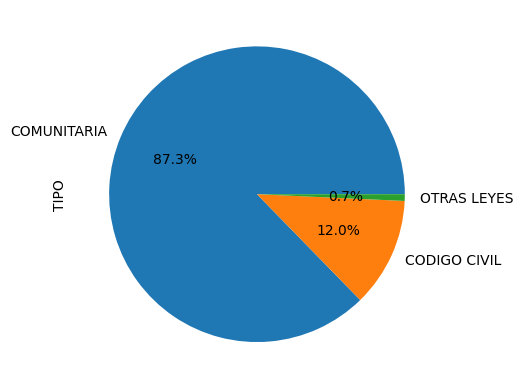

In [ ]:
# Gráfico de torta con el tipo de organización.
grafico_tipos = df_organizaciones.TIPO.value_counts()
grafico_tipos.plot.pie(autopct = '%1.1f%%')

<Axes: >

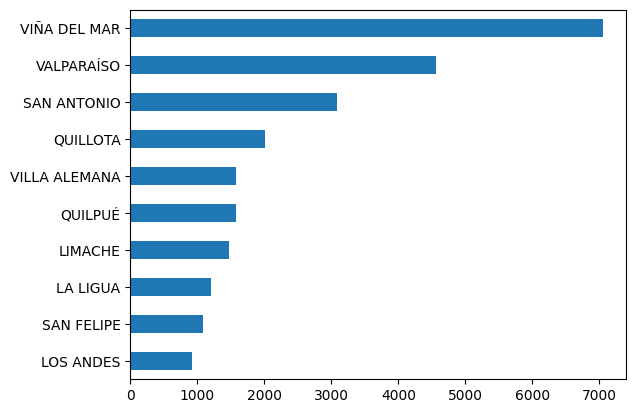

In [ ]:
# Gráfico de barras para las comunas con mayor cantidad de organizaciones.
cantidad_por_comuna = df_organizaciones.COMUNA.value_counts()
top_comunas = cantidad_por_comuna.head(10)
top_comunas = top_comunas.sort_values()
top_comunas.plot.barh()

<Axes: >

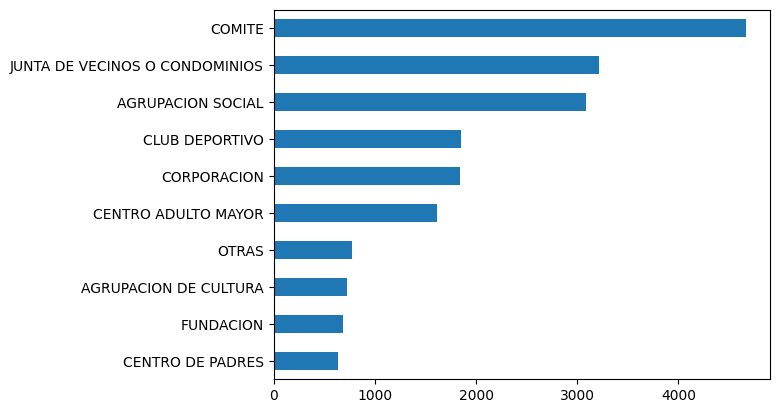

In [ ]:
# Gráfico de barras para las mayores categorías de organizaciones.
cantidad_por_clasificacion = df_organizaciones.CLASIFICACION.value_counts()
top_categorias = cantidad_por_clasificacion.head(10)
top_categorias = top_categorias.sort_values()
top_categorias.plot.barh()

<Axes: ylabel='Frequency'>

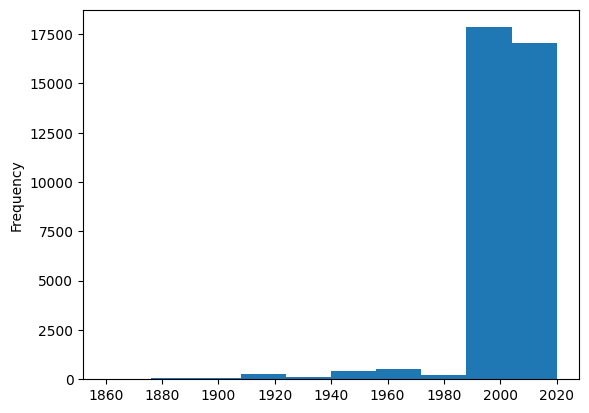

In [ ]:
# Histograma de constituciones de organizaciones por decenios.
df_organizaciones.DECENIOS.plot.hist()

Finalmente, del dataframe original con **37.628** registros, luego de la limpieza de datos, es posible poder extraer información de **36.586** registros, lo que representa una merma de menos del **3%** del total de registros.